# Milestone 1
Isabella Sturm

2021-04-25

In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

In [57]:
# Load the data
wine_subset = pd.read_csv('winemag-data.csv')

wine_subset = wine_subset.drop(columns=['designation', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle'])
#wine_df[['country', 'description', 'points','price', 'province', 'title', 'variety', 'winery']]

# Extract year from the Title
def getYear(x):
    year = re.search('(\d{4})', x)
    if year:
        return int(year.group())
    else:
        return None
wine_subset['year'] = wine_subset['title'].apply(lambda x: getYear(x))
wine_subset.head()

,Unnamed: 0,country,description,points,price,province,title,variety,winery,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


In [39]:
# Clean up wine reviews (descriptions) for analysis
wine_descriptions = wine_subset['description']

data = []
for desc in wine_descriptions:
    # Remove non-alphabetic characters and make all lowercase
    desc = re.sub('[^A-Za-z ]', '', desc)
    # Make all lowercase
    desc = desc.lower()
    
    # Tokenize the words
    tokenized_description = word_tokenize(desc)
    
    # Remove stop words and stems of words
    stemmer = PorterStemmer()
    processed_descriptions = []
    for word in tokenized_description:
        if word not in set(stopwords.words('english')):
            processed_descriptions.append(stemmer.stem(word))
            
    # Put the processed words back into connected string
    desc_text = " ".join(processed_descriptions)
    data.append(desc_text)
    
data

['aroma includ tropic fruit broom brimston dri herb palat isnt overli express offer unripen appl citru dri sage alongsid brisk acid',
 'ripe fruiti wine smooth still structur firm tannin fill juici red berri fruit freshen acid alreadi drinkabl although certainli better',
 'tart snappi flavor lime flesh rind domin green pineappl poke crisp acid underscor flavor wine stainlesssteel ferment',
 'pineappl rind lemon pith orang blossom start aroma palat bit opul note honeydrizzl guava mango give way slightli astring semidri finish',
 'much like regular bottl come across rather rough tannic rustic earthi herbal characterist nonetheless think pleasantli unfussi countri wine good companion hearti winter stew',
 'blackberri raspberri aroma show typic navarran whiff green herb case horseradish mouth fairli full bodi tomatoey acid spici herbal flavor complement dark plum fruit finish fresh grabbi',
 'here bright inform red open aroma candi berri white pepper savori herb carri palat balanc fresh ac

In [40]:
# Create feature matrix
features = CountVectorizer()
vectorized_descriptions = features.fit_transform(data)
vectorized_descriptions.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

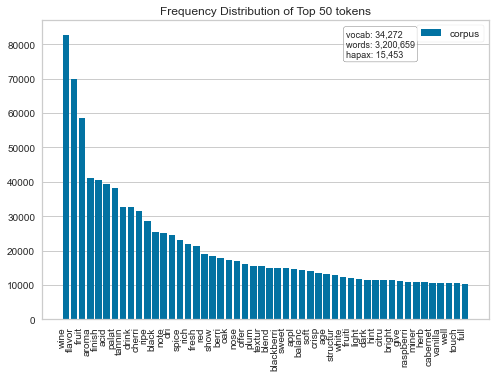

In [41]:
# Show to frequency of the top 50 words describing the wines
feature_words = features.get_feature_names()
visualizer = FreqDistVisualizer(features=feature_words, orient='v')
visualizer.fit(vectorized_descriptions)
visualizer.show()

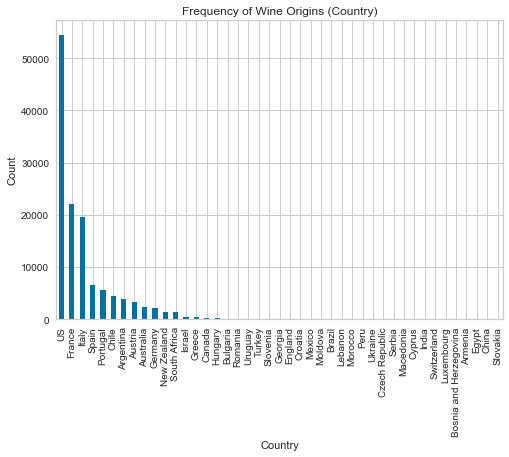

In [42]:
# Frequency of the countries wine comes from
plt.title("Frequency of Wine Origins (Country)")
plt.xlabel("Country")
plt.ylabel("Count")
wine_subset['country'].value_counts().plot(kind='bar')


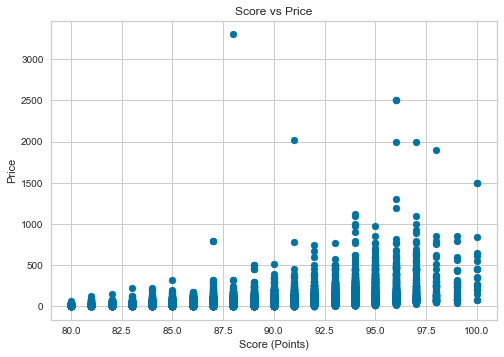

In [20]:
# Score compared to Price
fig,ax = plt.subplots()
ax.scatter(wine_subset['points'], wine_subset['price'])
plt.title("Score vs Price")
plt.xlabel("Score (Points)")
plt.ylabel("Price")
plt.show()

2013.0    15853
2012.0    15723
2014.0    15568
2011.0    12531
2010.0    12149
          ...  
1945.0        1
1941.0        1
1935.0        1
1934.0        1
1974.0        1
Name: year, Length: 91, dtype: int64


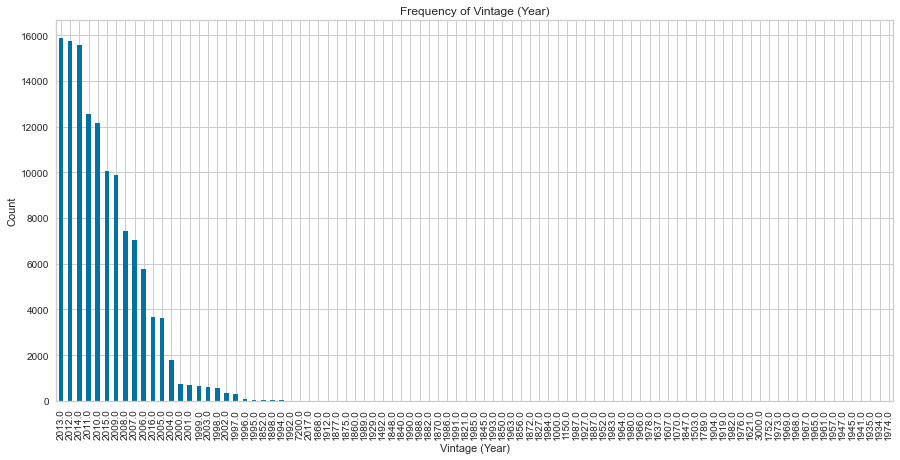

In [62]:
# Frequency of vintage (year)
plt.title("Frequency of Vintage (Year)")
plt.xlabel("Vintage (Year)")
plt.ylabel("Count")
wine_subset['year'].value_counts().plot(kind='bar')
print(wine_subset['year'].value_counts())

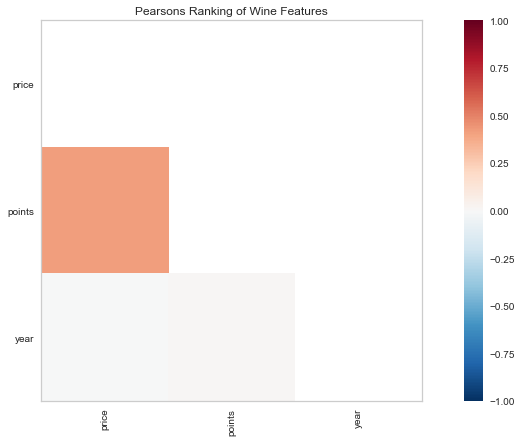

In [45]:
from yellowbrick.features import Rank2D
features = ['price', 'points', 'year']
x = wine_subset[features].dropna().values

# Use Pearsons ranking to view correlation between features
plt.rcParams['figure.figsize'] = (15,7)
visualizer = Rank2D(features=features, algorithm='pearson')
visualizer.fit(x)
visualizer.transform(x)
plt.title('Pearsons Ranking of Wine Features')
plt.show()

# Milestone 2
Isabella Sturm

2021-05-02

In [46]:
# Remove features that are not useful: title, winery
print(wine_subset['winery'].value_counts(),"\n")
print(wine_subset['title'].value_counts(),"\n")
print(wine_subset['country'].value_counts(),"\n")
print(wine_subset['province'].value_counts(),"\n")

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
François Buffet         1
Vilmart & Co            1
The Grinder             1
Château d'Arveyres      1
Banero                  1
Name: winery, Length: 16757, dtype: int64 

Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)        11
Korbel NV Brut Sparkling (California)                          9
Segura Viudas NV Extra Dry Sparkling (Cava)                    8
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)           7
Ruinart NV Brut Rosé  (Champagne)                              7
                                                              ..
Loïc Mahe 2013 Château la Franchaie  (Savennières)             1
Gemma 2008 Gibin Riserva  (Barolo)                             1
Quara 2014 Special Selection Cabernet Sauvignon (Cafayate)     1
Mademoiselle Comédie 2014  Bordeaux Blanc                      1
Three Pines 2012 Bla

In [58]:
wine_subset.drop(columns=['winery','title','province'], inplace=True)
wine_subset.head()

,Unnamed: 0,country,description,points,price,variety,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,2013.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,2011.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,2013.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,2013.0
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,2012.0


I removed title from the feature list because it has nothing to do with the quality and price of wine - it is really just a combination of the winery, vintage and varietal which are contained in other columns of the dataset.

I removed winery from the feature list because while it is possible that a winery has a certain prestige that could inflate it's wine prices, this dataset has too many unique values/not enough data about each winery to be able to draw any conclusions about how the winery's reputation plays into the price/quality of wine.

I removed province from the list because while there are a few values from province that have a ton of data there are too many rows with unique of limited data to be able to pull insights from more specific regions - we will only be able to use country for this dataset.

In [67]:
# For the year field we want to fill the na values with the most year
import numpy as np
def fill_na_most(data, inplace=True):
    mode=data.mode().values[0]
    return data.fillna(value=mode, inplace=inplace)

fill_na_most(wine_subset['year'])

print(wine_subset['year'].describe())

count    129971.000000
mean       2011.089020
std          54.759788
min        1000.000000
25%        2009.000000
50%        2012.000000
75%        2013.000000
max        7200.000000
Name: year, dtype: float64


In [68]:
wine_subset[wine_subset['year'].isnull()]

,Unnamed: 0,country,description,points,price,variety,year


I used mean to fill na values for year because a statistic like mean wouldn't make sense since there is no year 2011.01287 and using the value that comes up most in the dataset has a high probability of being the correct year.

In [69]:
# For the price field, we want to fill the na values with the mean price
def fill_na_mean(data, inplace=True):
    return data.fillna(data.mean(), inplace=inplace)

fill_na_mean(wine_subset['price'])
print(wine_subset['price'].describe())

count    129971.000000
mean         35.363389
std          39.577066
min           4.000000
25%          18.000000
50%          28.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


In [70]:
wine_subset[wine_subset['price'].isnull()]

,Unnamed: 0,country,description,points,price,variety,year


I used mean to fill in the na values of the price field because price is a more continuous value, compared to year, so using the mean to fill na makes the most sense to me.

In [63]:
wine_subset.head()

,country,description,points,price,variety,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,35.363389,White Blend,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Portuguese Red,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Pinot Gris,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,Riesling,2013.0
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Pinot Noir,2012.0


In [64]:
wine_subset['variety'].value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Franconia                       1
Cercial                         1
Sauvignon-Sémillon              1
Schwartzriesling                1
Ryzlink Rýnský                  1
Name: variety, Length: 707, dtype: int64

In [15]:
cat_features = ['country', 'variety']
wine_cat = wine_subset[cat_features]
wine_cat_dummies = pd.get_dummies(wine_cat)
print(wine_cat_dummies.head())

   country_Argentina  country_Armenia  country_Australia  country_Austria  \
0                  0                0                  0                0   
1                  0                0                  0                0   
2                  0                0                  0                0   
3                  0                0                  0                0   
4                  0                0                  0                0   

   country_Bosnia and Herzegovina  country_Brazil  country_Bulgaria  \
0                               0               0                 0   
1                               0               0                 0   
2                               0               0                 0   
3                               0               0                 0   
4                               0               0                 0   

   country_Canada  country_Chile  country_China  ...  variety_Yapincak  \
0               0              0    

# Milestone 3
Isabella Sturm

2021-05-06

In [90]:
# Split dataset and prepare data for modelling
from sklearn.model_selection import train_test_split

# Create a features dataset to train and validate data model
model_features = ['price']
wine_model_x = pd.concat([wine_subset[model_features], wine_cat_dummies], axis=1)

# Create target dataset for training and validating data model
wine_model_y = wine_subset['points']

# Split the data
x_train, x_val, y_train, y_val = train_test_split(wine_model_x, wine_model_y, test_size=0.3, random_state=11)

# View the details of the split data
print("Number of samples in training set: ", x_train.shape[0])
print("Number of samples in validation set: ", x_val.shape[0])
print("\n")
print("Number of unique scores in training set: ")
print(y_train.value_counts())
print("\n")
print("Number of unique scores in test set: ")
print(y_val.value_counts())


Number of samples in training set:  90979
Number of samples in validation set:  38992


Number of unique scores in training set: 
88     12045
87     11782
90     10789
86      8736
89      8582
91      7991
92      6735
85      6688
93      4603
84      4554
94      2601
83      2071
82      1307
95      1088
81       490
96       368
80       302
97       162
98        51
99        22
100       12
Name: points, dtype: int64


Number of unique scores in test set: 
88     5162
87     5151
90     4621
86     3864
89     3644
91     3368
92     2878
85     2842
84     1926
93     1886
94     1157
83      954
82      529
95      447
81      202
96      155
80       95
97       67
98       26
99       11
100       7
Name: points, dtype: int64


/Users/isabellasturm/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


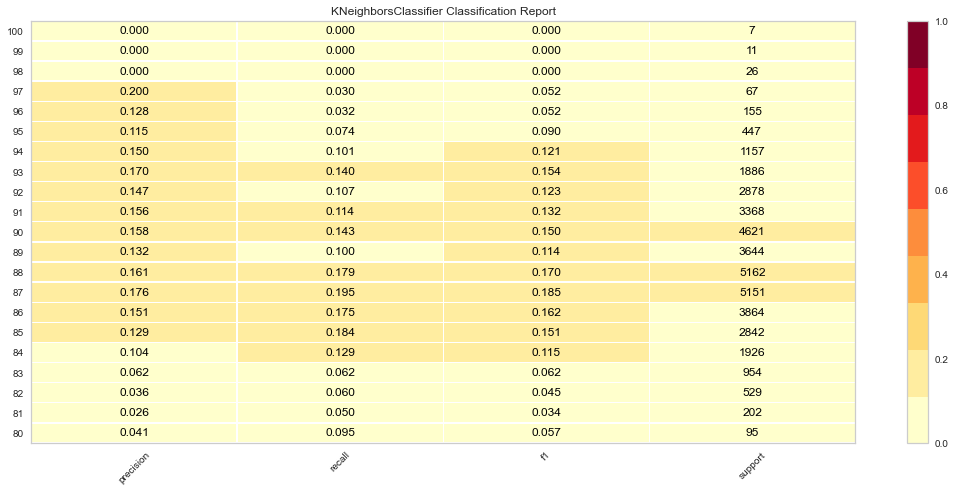

In [91]:
# Evaluate metrics/model
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

model = KNeighborsClassifier()
#classes=["88","87","90","86","89","91","92","85","84","93","94","83",
 #        "82","95","81","96","80","97","98","99","100"]

visualizer = ClassificationReport(model, support=True)

visualizer.fit(x_train, y_train)
visualizer.score(x_val, y_val)
visualizer.show()


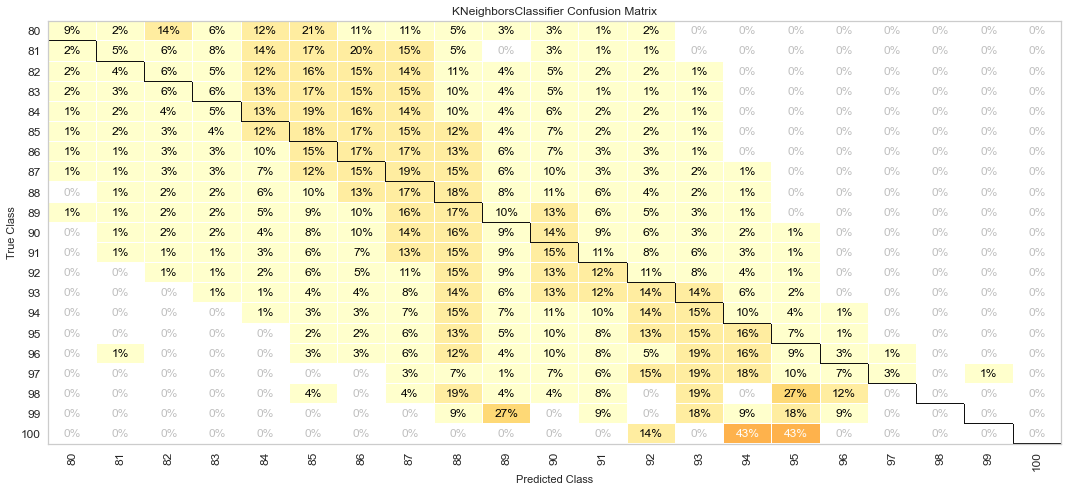

In [92]:
# Build a conusion matrix
cm = ConfusionMatrix(model, percent=True)

cm.fit(x_train, y_train)
cm.score(x_val, y_val)

cm.show()

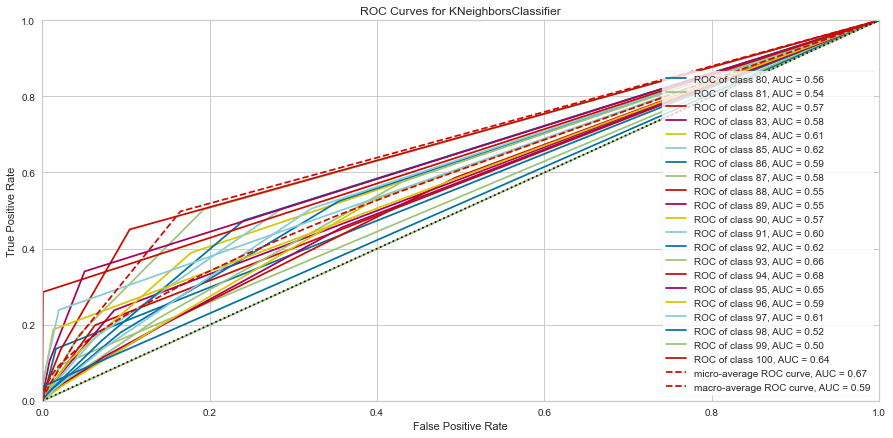

In [93]:
# ROC and AUC
visualizer = ROCAUC(model)

visualizer.fit(x_train, y_train)
visualizer.score(x_val, y_val)
visualizer.show()

In [94]:
# Try again with only price
# Split dataset and prepare data for modelling
from sklearn.model_selection import train_test_split

# Create a features dataset to train and validate data model
model_features = ['price']
wine_model_x = wine_subset[model_features]

# Create target dataset for training and validating data model
wine_model_y = wine_subset['points']

# Split the data
x_train, x_val, y_train, y_val = train_test_split(wine_model_x, wine_model_y, test_size=0.3, random_state=11)

# View the details of the split data
print("Number of samples in training set: ", x_train.shape[0])
print("Number of samples in validation set: ", x_val.shape[0])
print("\n")
print("Number of unique scores in training set: ")
print(y_train.value_counts())
print("\n")
print("Number of unique scores in test set: ")
print(y_val.value_counts())

Number of samples in training set:  90979
Number of samples in validation set:  38992


Number of unique scores in training set: 
88     12045
87     11782
90     10789
86      8736
89      8582
91      7991
92      6735
85      6688
93      4603
84      4554
94      2601
83      2071
82      1307
95      1088
81       490
96       368
80       302
97       162
98        51
99        22
100       12
Name: points, dtype: int64


Number of unique scores in test set: 
88     5162
87     5151
90     4621
86     3864
89     3644
91     3368
92     2878
85     2842
84     1926
93     1886
94     1157
83      954
82      529
95      447
81      202
96      155
80       95
97       67
98       26
99       11
100       7
Name: points, dtype: int64


/Users/isabellasturm/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


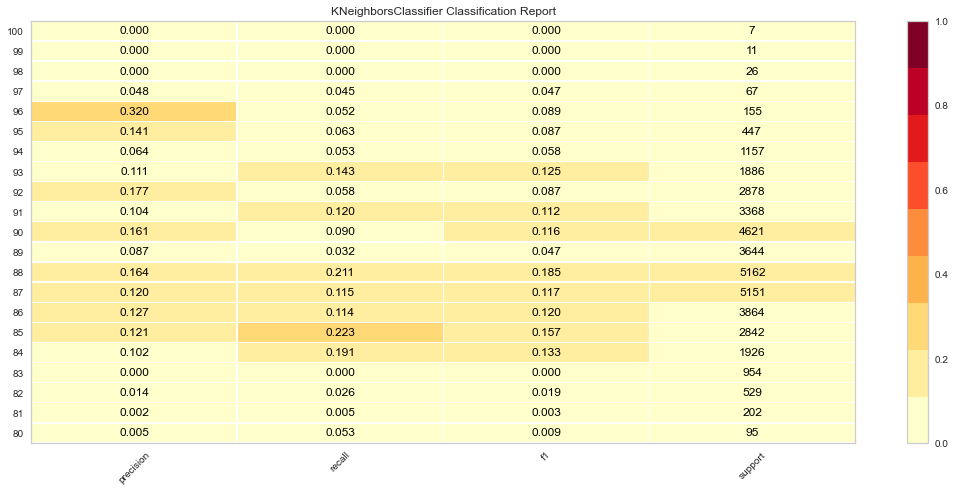

In [95]:
# Evaluate metrics/model
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

model = KNeighborsClassifier()
#classes=["88","87","90","86","89","91","92","85","84","93","94","83",
 #        "82","95","81","96","80","97","98","99","100"]

visualizer = ClassificationReport(model, support=True)

visualizer.fit(x_train, y_train)
visualizer.score(x_val, y_val)
visualizer.show()

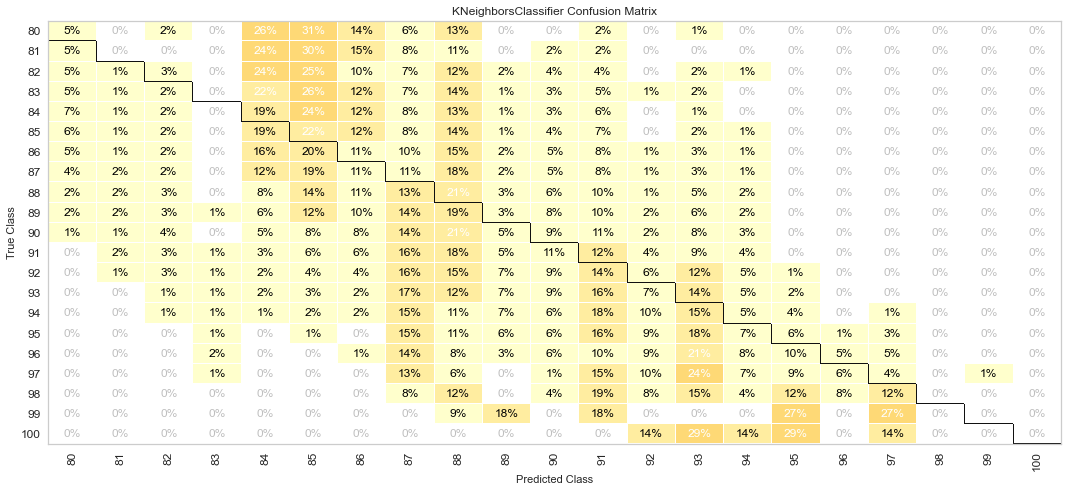

In [96]:
# Build a conusion matrix
cm = ConfusionMatrix(model, percent=True)

cm.fit(x_train, y_train)
cm.score(x_val, y_val)

cm.show()

I used KNN because I was thinking the scores are not very continuous - theoretically it could be an integer between 0 and 100 so I thought using a classification method would be best. However it doesn't seem like this provides very accurate results. I might have to go back and explore other models that would be a better fit for the data. 